In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parcial

## a)

In [10]:
# Definir las condiciones iniciales y parámetros
x0_1 = 0
y0_1 = 0.7
x0_2 = 0
y0_2 = -0.7

v0x_1 = 0.1
v0y_1 = 0
v0x_2 = -0.1
v0y_2 = 0

k = 1
l0 = 1

mu = 0.5 

r_inicial = np.sqrt((x0_2 - x0_1)**2 + (y0_2 - y0_1)**2)

In [11]:
def momento_angular_inicial(x0_1, y0_1, v0x_1, v0y_1, x0_2, y0_2, v0x_2, v0y_2):
    r1 = np.array([x0_1, y0_1])
    r2 = np.array([x0_2, y0_2])
    v1 = np.array([v0x_1, v0y_1])
    v2 = np.array([v0x_2, v0y_2])
    delta_r = r1 - r2
    delta_v = v1 - v2
    l_inicial = np.cross(delta_r, delta_v)
    return l_inicial

In [12]:
def potEf(momento_angular_inicial, r, mu):
    U = 0.5 * k * (r - l0)**2
    V = (momento_angular_inicial**2) / (2 * mu * r**2)
    return (U + V)/mu

In [13]:
def energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, k, l0, r_inicial, mu):
    E_mec_inicial = 0.5 * mu * ((v0x_1 - v0x_2)**2 + (v0y_1 - v0y_2)**2) + 0.5 * k * (r_inicial - l0)**2
    return E_mec_inicial/mu

In [14]:
E_mec_inicial = energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, k, l0, r_inicial, mu)
l_inicial = momento_angular_inicial(x0_1, y0_1, v0x_1, v0y_1, x0_2, y0_2, v0x_2, v0y_2)

In [15]:
l_inicial = l_inicial * mu

In [16]:
r_range = np.linspace(0.01, 3.1, 2500)
momento_angular_range = np.zeros_like(r_range)  # Asumir momento angular cero para simplificar
U_ef = potEf(l_inicial, r_range, mu)

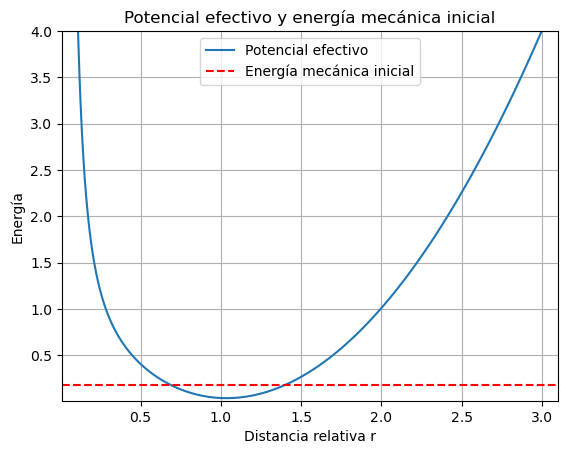

El mínimo es: 0.03781858419172122


In [17]:
# Graficar el potencial efectivo y la energía mecánica inicial
plt.plot(r_range, U_ef, label='Potencial efectivo')
plt.axhline(y=E_mec_inicial, color='r', linestyle='--', label='Energía mecánica inicial')
plt.xlabel('Distancia relativa r')
plt.ylabel('Energía')
plt.title('Potencial efectivo y energía mecánica inicial')
plt.xlim(0.01, 3.1)
plt.ylim(0.01, 4)
plt.legend()
plt.grid(True)
plt.show()

print(f"El mínimo es:", U_ef.min())

## b)

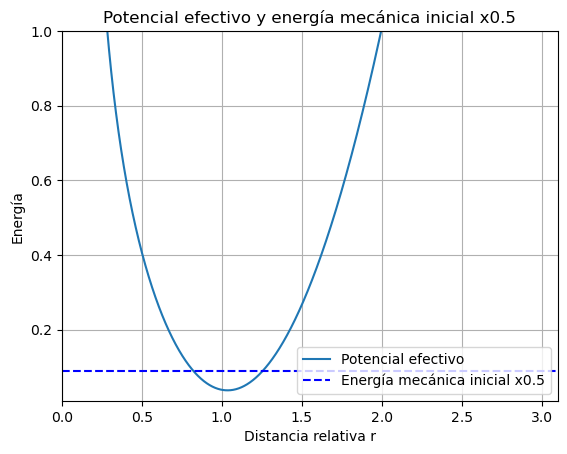

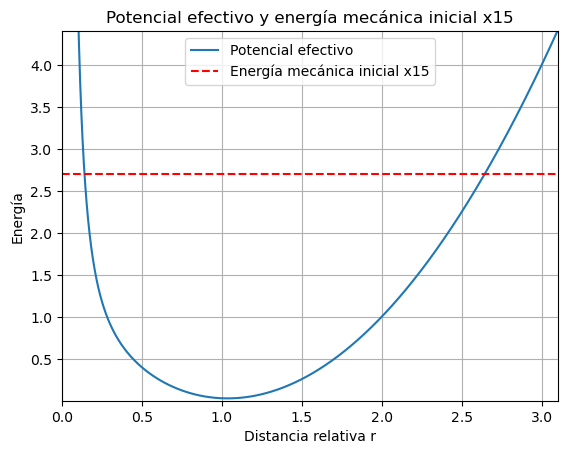

In [18]:
# Colores para las líneas de energía mecánica inicial
colores = ['blue', 'red']  # Añade más colores si tienes más factores
nums = [0.5, 15]

# Iterar sobre los factores en nums para crear una gráfica para cada uno
for i, factor in enumerate(nums):
    # Crear una nueva figura para cada gráfica
    plt.figure()
    
    # Graficar el potencial efectivo
    plt.plot(r_range, U_ef, label='Potencial efectivo')
    
    # Calcular la energía mecánica inicial ajustada por el factor actual
    E_mec_inicial = energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, k, l0, r_inicial, mu) * factor
    
    # Graficar la energía mecánica inicial para el factor actual
    plt.axhline(y=E_mec_inicial, color=colores[i], linestyle='--', label=f'Energía mecánica inicial x{factor}')
    
    # Configurar el resto de la gráfica
    plt.xlabel('Distancia relativa r')
    plt.ylabel('Energía')
    plt.title(f'Potencial efectivo y energía mecánica inicial x{factor}')
    if i == 1:
        plt.xlim(0, 3.1)
        plt.ylim(0.01, 4.4)
    elif i == 0:
        plt.xlim(0, 3.1)
        plt.ylim(0.01, 1)
    plt.legend()
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()

El movimiento relativo tiende a ser más simétrico, con un comportamiento sinusoidal, cuando las energías mecánicas son bajas debido a la naturaleza del potencial efectivo y las limitaciones impuestas por la energía total del sistema.

Cuando la energía mecánica es baja, significa que la energía cinética de las partículas es relativamente pequeña en comparación con las barreras potenciales presentes en el potencial efectivo.

## c)

El movimiento relativo puede volverse asimétrico debido a que, si la energía total del sistema es baja, la partícula puede no tener suficiente energía cinética para superar las barreras potenciales del potencial efectivo. Esto restringe su movimiento y puede hacer que permanezca más tiempo en un lado del potencial, resultando en un comportamiento asimétrico.

## d)

In [19]:
def rk4(f, u0, t0, tf, h):
    # Inicializar arrays de tiempo y solución
    t = np.arange(t0, tf, h)
    u = np.zeros((len(t), len(u0)))
    u[0] = u0
    
    # Iterar con RK4
    for i in range(0, len(t) - 1):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + k1/2, t[i] + h/2)
        k3 = h * f(u[i] + k2/2, t[i] + h/2)
        k4 = h * f(u[i] + k3, t[i] + h)
        
        u[i + 1] = u[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, u

In [20]:
def resorte(u, t):
    #l es la longitud del resorte en un t
    l = np.sqrt((u[4] - u[0])**2 + (u[6] - u[2])**2)
    deriv = np.array([u[1], (w**2) * (l-l0) * (u[4] - u[0]) / l, u[3], (w**2) * (l-l0) * (u[6] - u[2]) / l, u[5], -(w**2) * (l - l0) * (u[4] - u[0]) / l, u[7], -(w**2) * (l-l0) * (u[6] - u[2]) / l])
    return deriv

In [21]:
# Definir las condiciones iniciales y parámetros
x0_1 = 0
y0_1 = 1.5  # Aumentar la distancia inicial para aumentar la energía potencial
x0_2 = 0
y0_2 = -1.5
v0x_1 = 0.5  # Aumentar la velocidad inicial para aumentar la energía cinética
v0y_1 = 0
v0x_2 = -0.5
v0y_2 = 0
u0 = np.array([x0_1, v0x_1, y0_1, v0y_1, x0_2, v0x_2, y0_2, v0y_2])

w = 1
l0 = 1
tf = 25
h = 0.01
t0 = 0

In [22]:
t, u = rk4(resorte, u0, t0, tf, h)

E_mec_inicial_alta = energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, w, l0, r_inicial, mu)

r_range = np.linspace(0.01, 3.1, 2500)
U_ef = potEf(l_inicial, r_range, mu)

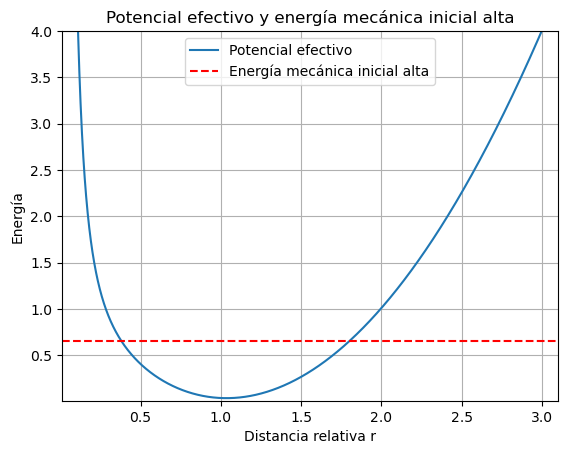

El mínimo es: 0.03781858419172122


In [23]:
plt.plot(r_range, U_ef, label='Potencial efectivo')
plt.axhline(y=E_mec_inicial_alta, color='r', linestyle='--', label='Energía mecánica inicial alta')
plt.xlabel('Distancia relativa r')
plt.ylabel('Energía')
plt.title('Potencial efectivo y energía mecánica inicial alta')
plt.xlim(0.01, 3.1)
plt.ylim(0.01, 4)
plt.legend()
plt.grid(True)
plt.show()

print(f"El mínimo es:", U_ef.min())

## e)

In [24]:
x0_1 = 0
y0_1 = 1.5  # Aumentar la distancia inicial para aumentar la energía potencial
x0_2 = 0
y0_2 = -1.5
v0x_1 = 0.5  # Aumentar la velocidad inicial para aumentar la energía cinética
v0y_1 = 0
v0x_2 = -0.5
v0y_2 = 0
u0 = np.array([x0_1, v0x_1, y0_1, v0y_1, x0_2, v0x_2, y0_2, v0y_2])

w = 1
l0 = 1
tf = 25
h = 0.01
t0 = 0
mu = 0.5

r_inicial = np.sqrt((x0_2 - x0_1)**2 + (y0_2 - y0_1)**2)

In [25]:
t, u = rk4(resorte, u0, t0, tf, h)

In [26]:

E_mec_inicial_alta = energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, w, l0, r_inicial, mu)
E_mec_inicial_alta_mu = E_mec_inicial_alta / mu

In [27]:
r_range = np.linspace(0.01, 3.1, 2500)
U_ef = potEf(l_inicial, r_range, mu)

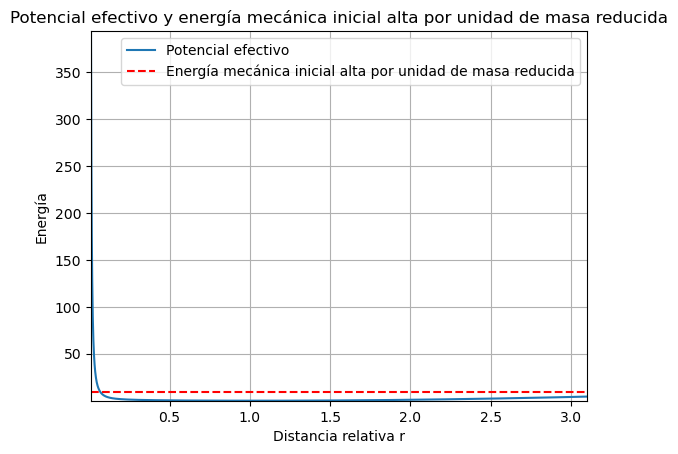

El mínimo es: 0.03781858419172122


In [28]:
plt.plot(r_range, U_ef, label='Potencial efectivo')
plt.axhline(y=E_mec_inicial_alta_mu, color='r', linestyle='--', label='Energía mecánica inicial alta por unidad de masa reducida')
plt.xlabel('Distancia relativa r')
plt.ylabel('Energía')
plt.title('Potencial efectivo y energía mecánica inicial alta por unidad de masa reducida')
plt.xlim(0.01, 3.1)
plt.ylim(0.01, max(E_mec_inicial_alta_mu, np.max(U_ef)) + 0.5)  # Ajustar el límite superior
plt.legend()
plt.grid(True)
plt.show()

print(f"El mínimo es:", U_ef.min())


En este gráfico, aunque se vea diferente podemos observar (por el mínimo) que es el mismo que el pasado. La línea horizontal representa la energía mecánica inicial alta por unidad de masa reducida. Al observar este gráfico, podemos interpretar cómo la energía total del sistema se compara con el potencial efectivo en función de la distancia relativa entre las masas. Esto nos puede dar una idea de la estabilidad del sistema y de cómo varía la energía potencial y cinética a lo largo de la simulación.

## f)

In [29]:
def calcular_periodo_oscilacion(u, t):
    y_rel = u[:, 2] - u[:, 6]
    cambios_signo = np.where(np.diff(np.sign(y_rel)))[0]
    tiempos_cambios = t[cambios_signo]
    intervalos = np.diff(tiempos_cambios)
    periodo = 2 * np.mean(intervalos)

    return periodo

In [30]:
periodo_oscilacion = calcular_periodo_oscilacion(u, t)
print(f'Período de oscilación: {periodo_oscilacion}')

Período de oscilación: 6.265714285714286


Los resultados obtenidos para la distancia relativa $r(t)$ y el período de oscilación proporcionan información valiosa sobre el comportamiento del sistema de dos masas unidas por un resorte:

1. ### Distancia relativa $r(t)$:
La distancia relativa oscila entre un valor mínimo de aproximadamente 0.688 y un máximo de 1.4, con un valor en equilibrio de alrededor de 1.048. Esto indica que el sistema experimenta oscilaciones alrededor de un punto de equilibrio, con el resorte estirándose y comprimiéndose a lo largo del tiempo.

2. ### Período de oscilación:
El período de oscilación calculado es aproximadamente 6.266, lo que representa el tiempo que tarda el sistema en completar un ciclo completo de oscilación. Este período está relacionado con la energía total del sistema y la rigidez del resorte.

En resumen, estos resultados muestran que el sistema de dos masas unidas por un resorte exhibe un comportamiento oscilatorio, con la distancia relativa variando alrededor de un valor de equilibrio y un período de oscilación que depende de la energía mecánica y la rigidez del resorte.


